In [ ]:
# Since your project’s goal is:

# “Optimization of Power in Hybrid Electric Vehicles using Machine Learning”

In [ ]:
# Option 1 — Predict Engine Power (Power Optimization)
# Use Case: Learn how to optimally split total power between engine and battery.
#  Target Variable: Engine Power (kW)
#  Model Input Features:
# Speed, Acceleration, SOC, Battery Degradation, Regenerative Braking Power, Driving Cycle Type
#  Model Type: Regression (Random Forest / XGBoost / DNN)
# → This is the most suitable for your project title.




# Option 2 — Predict Target Efficiency (Efficiency Optimization)
# Use Case: Learn driving and energy management patterns that maximize efficiency.
#  Target Variable: Target Efficiency
#  Model Input Features:
# Speed, Acceleration, SOC, Engine Power, Battery Power, Regenerative Braking Power, Driving Cycle Type
#  Model Type: Regression
# → This is suitable if you focus more on energy efficiency than power split.

In [78]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost  import XGBRegressor

from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor




In [2]:
df=pd.read_csv("nev_energy_management_dataset.csv")

In [3]:
df.sample(4)

,Time (s),Speed (km/h),Acceleration (m/s²),Power Demand (kW),Engine Power (kW),Battery Power (kW),Fuel Consumption (L/100km),SOC (%),Battery Degradation (%),Regenerative Braking Power (kW),Total Energy Used (kWh),Driving Cycle Type,Target Efficiency
2666,2666,62.722613,-0.514848,51.367465,28.089453,23.278012,5.988036,40.262654,5.973735,6.371166,57.738631,HWFET,Medium Efficiency
2768,2768,42.253555,0.346912,47.565935,19.928995,27.636940,3.828537,37.959875,6.204013,0.000000,47.565935,Urban,Low Efficiency
4394,4394,62.594958,0.084987,52.961336,35.809931,17.151405,4.419856,20.000000,9.853193,0.000000,52.961336,Urban,Low Efficiency
4354,4354,56.063193,-1.080652,43.846861,27.882006,15.964855,3.565748,20.000000,9.758431,8.111228,51.958090,WLTC,Low Efficiency


<Axes: >

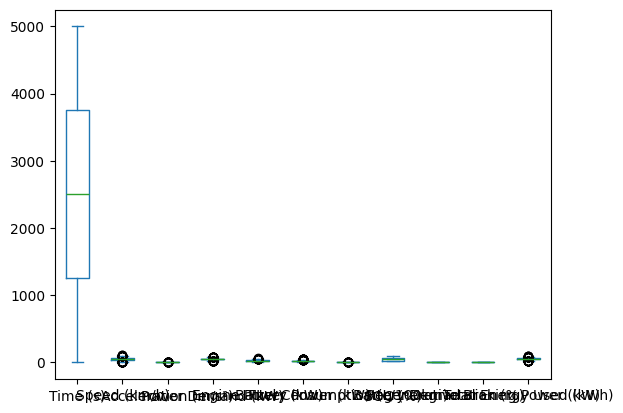

In [4]:
df.plot(kind="box")

In [5]:
df.describe()

,Time (s),Speed (km/h),Acceleration (m/s²),Power Demand (kW),Engine Power (kW),Battery Power (kW),Fuel Consumption (L/100km),SOC (%),Battery Degradation (%),Regenerative Braking Power (kW),Total Energy Used (kWh)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,50.084029,-0.004937,50.105530,27.682015,22.423515,4.987227,48.591637,5.533014,2.536712,52.642242
std,1443.520003,14.947197,0.505219,9.987698,6.973683,6.392196,1.490008,26.594421,3.135059,3.249302,10.563013
min,0.000000,1.380990,-1.961200,16.244209,8.080777,4.927980,0.002339,20.000000,0.002088,0.000000,16.244209
25%,1249.750000,40.131424,-0.343291,43.391136,22.598689,17.736560,3.949523,20.000000,2.799814,0.000000,45.469066
50%,2499.500000,50.201984,-0.008725,50.099174,27.277890,21.776793,4.993327,44.017998,5.598200,0.118897,52.524760
75%,3749.250000,59.990159,0.338619,56.755342,32.332494,26.603547,6.003215,72.001862,8.394543,5.034283,59.919275
max,4999.000000,108.893566,1.764528,84.289105,57.590132,47.813232,10.417025,99.979122,10.000000,9.997894,92.736056


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
df.isnull().sum()

Time (s)                           0
Speed (km/h)                       0
Acceleration (m/s²)                0
Power Demand (kW)                  0
Engine Power (kW)                  0
Battery Power (kW)                 0
Fuel Consumption (L/100km)         0
SOC (%)                            0
Battery Degradation (%)            0
Regenerative Braking Power (kW)    0
Total Energy Used (kWh)            0
Driving Cycle Type                 0
Target Efficiency                  0
dtype: int64

<Axes: ylabel='Frequency'>

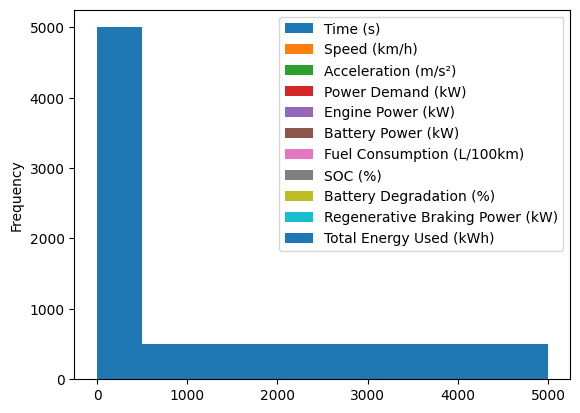

In [9]:
df.plot(kind="hist")

In [10]:
df.columns

Index(['Time (s)', 'Speed (km/h)', 'Acceleration (m/s²)', 'Power Demand (kW)',
       'Engine Power (kW)', 'Battery Power (kW)', 'Fuel Consumption (L/100km)',
       'SOC (%)', 'Battery Degradation (%)', 'Regenerative Braking Power (kW)',
       'Total Energy Used (kWh)', 'Driving Cycle Type', 'Target Efficiency'],
      dtype='object')

In [16]:
hist1=df.select_dtypes("number").columns.to_list()

<Axes: xlabel='Power Demand (kW)', ylabel='Density'>

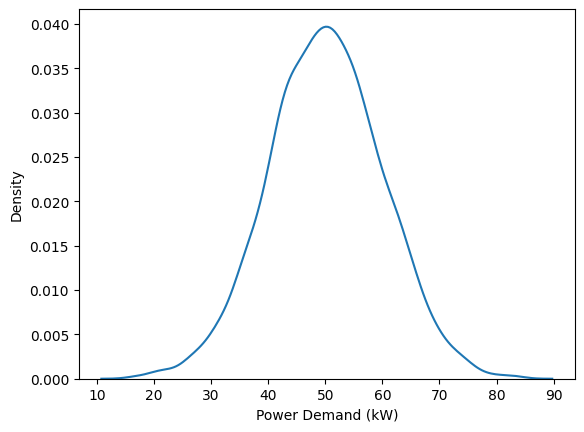

In [26]:
sns.kdeplot(df["Power Demand (kW)"])

<Axes: xlabel='Engine Power (kW)', ylabel='Density'>

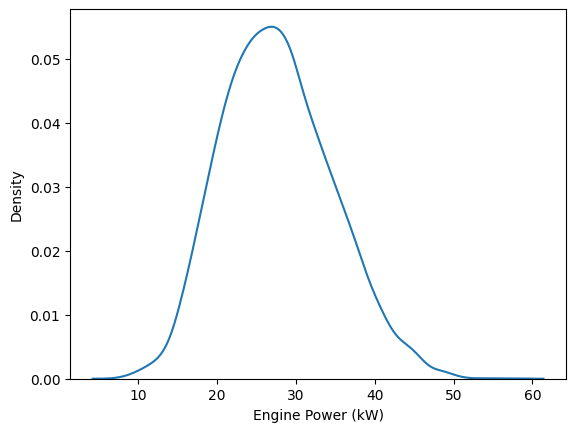

In [27]:
sns.kdeplot(df["Engine Power (kW)"])

<Axes: xlabel='Battery Power (kW)', ylabel='Density'>

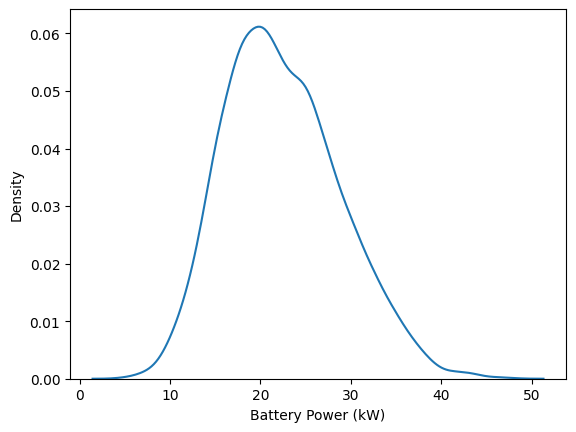

In [28]:
sns.kdeplot(df["Battery Power (kW)"])

In [30]:
# Since your project name explicitly mentions:
# “Optimization of Power in Hybrid Electric Vehicles”

# Use:
# Target variable: Engine Power (kW)

In [59]:
# Project Title
# Machine Learning-Based Energy Management System for Optimization of Power in Hybrid Electric Vehicles

# ⃣Objective
# To develop a machine learning model that predicts the optimal Engine Power (kW) required under varying driving and battery conditions — thereby achieving efficient power distribution and fuel economy in hybrid electric vehicles (HEVs).

# ️ Target Variable
# "Engine Power (kW)"
# → Represents the power output from the internal combustion engine that the ML model will learn to optimize.

# ️ Feature Variables (Inputs X)
# Feature Name	Description
# Speed (km/h)	Current vehicle speed; directly influences power requirement.
# Acceleration (m/s²)	Indicates driver behavior and dynamic load; affects engine response.
# SOC (%)	State of Charge of the battery; helps decide when to use engine or electric motor.
# Battery Degradation (%)	Health of the battery; influences long-term power management.
# Regenerative Braking Power (kW)	Power recovered during braking; helps improve efficiency and reduce engine load.
# Driving Cycle Type	Represents driving condition (City / Highway / Mixed), crucial for adaptive control.

In [55]:


df_train, df_test = train_test_split(df, test_size=0.2, random_state=555)


df_x_train = df_train.drop(columns=["Engine Power (kW)"], axis=1)
df_y_train = df_train["Engine Power (kW)"]

df_x_test = df_test.drop(columns=["Engine Power (kW)"], axis=1)
df_y_test = df_test["Engine Power (kW)"]


In [56]:

df_x_train = pd.get_dummies(df_x_train, drop_first=True)
df_x_test = pd.get_dummies(df_x_test, drop_first=True)


In [57]:
# Make sure both have same columns
df_x_train, df_x_test = df_x_train.align(df_x_test, join='left', axis=1, fill_value=0)

In [ ]:

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df_x_train, df_y_train)


In [60]:
df_x_train

,Time (s),Speed (km/h),Acceleration (m/s²),Power Demand (kW),Battery Power (kW),Fuel Consumption (L/100km),SOC (%),Battery Degradation (%),Regenerative Braking Power (kW),Total Energy Used (kWh),Driving Cycle Type,Target Efficiency_1,Target Efficiency_Medium Efficiency
3185,3185,69.958624,-0.663131,74.409240,30.334721,1.811820,28.687120,7.131288,9.883046,84.292285,1,False,False
3159,3159,54.697767,-0.380971,61.522507,28.508247,6.215502,29.293315,7.070668,5.290346,66.812853,0,False,False
3102,3102,74.742213,-0.240287,51.108364,24.151167,7.844874,30.564761,6.943524,0.777132,51.885496,2,False,False
120,120,61.865479,-0.690299,75.031718,33.748391,4.492720,97.183022,0.281698,3.569738,78.601456,0,True,False
2567,2567,59.767044,-0.612500,46.500299,23.410178,4.547730,42.554908,5.744509,3.709481,50.209780,2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,40.225995,-0.128473,38.959744,12.132393,4.357772,94.706826,0.529317,4.422993,43.382736,2,True,False
1430,1430,54.611100,-0.314335,47.313221,22.625100,5.233878,68.065512,3.193449,1.011635,48.324857,2,False,False
2628,2628,43.354340,-0.803128,52.197581,31.072062,3.267387,41.159761,5.884024,9.294322,61.491903,0,False,False
1057,1057,67.590935,0.512816,43.239293,23.404823,5.379339,76.353823,2.364618,0.000000,43.239293,0,False,False


In [54]:
#  Evaluate
y_pred = model.predict(df_x_test)
print("MSE:", mean_squared_error(df_y_test, y_pred))
print("R²:", r2_score(df_y_test, y_pred))


MSE: 0.2760189286629834
R²: 0.9948626291636875


In [58]:
# The Random Forest Regressor achieved an R² score of 0.9948, indicating that the model captures nearly all variations in Engine Power (kW) from the input parameters such as speed, SOC, acceleration, etc.
# The low MSE value of 0.276 shows that prediction errors are minimal, confirming that the model is well-trained and generalizes effectively on unseen test data.

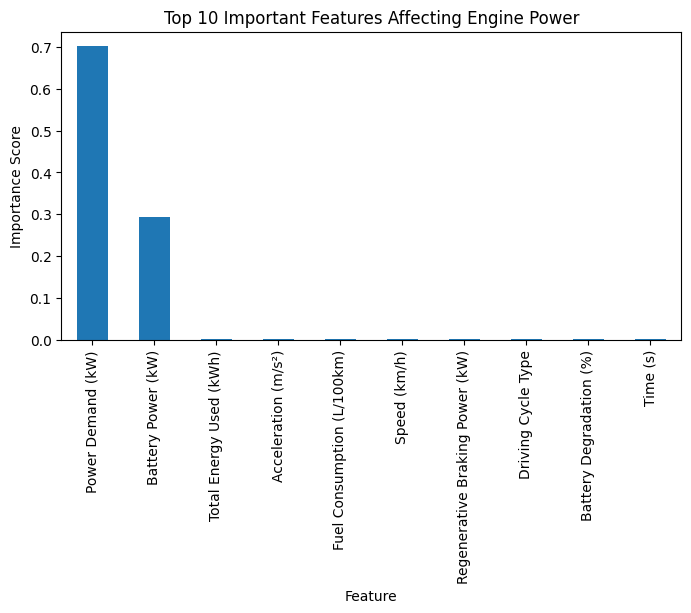

In [61]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=df_x_train.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Important Features Affecting Engine Power")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


In [62]:
model.feature_importances_

array([2.45623443e-04, 5.22961564e-04, 5.47505899e-04, 7.01790810e-01,
       2.93292685e-01, 5.25366856e-04, 2.35153015e-04, 2.48590145e-04,
       2.79255634e-04, 1.95830395e-03, 2.65199681e-04, 4.10410175e-05,
       4.75030388e-05])

In [63]:
feature_imp=pd.DataFrame()
feature_imp["feature"]=df_x_train.columns
feature_imp["IMP"]=model.feature_importances_

In [64]:
feature_imp

,feature,IMP
0,Time (s),0.000246
1,Speed (km/h),0.000523
2,Acceleration (m/s²),0.000548
3,Power Demand (kW),0.701791
4,Battery Power (kW),0.293293
5,Fuel Consumption (L/100km),0.000525
6,SOC (%),0.000235
7,Battery Degradation (%),0.000249
8,Regenerative Braking Power (kW),0.000279
9,Total Energy Used (kWh),0.001958


In [65]:
# # only two feature aare more important 
# Power Demand (kW)	0.701791
# 4	Battery Power (kW)	0.293293

In [68]:
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(df_x_train, df_y_train)

y_pred_ada = ada_model.predict(df_x_test)

print(" AdaBoost Results")
print("MSE:", mean_squared_error(df_y_test, y_pred_ada))
print("R²:", r2_score(df_y_test, y_pred_ada))

🔹 AdaBoost Results
MSE: 6.627910405077502
R²: 0.8766387733418373


In [71]:

gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                      max_depth=4, random_state=42)
gbr_model.fit(df_x_train, df_y_train)

y_pred_gbr = gbr_model.predict(df_x_test)

print(" Gradient Boosting Results")
print("MSE:", mean_squared_error(df_y_test, y_pred_gbr))
print("R²:", r2_score(df_y_test, y_pred_gbr))


🔹 Gradient Boosting Results
MSE: 0.22098686232661544
R²: 0.9958869072232682


In [73]:


xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05,
                         max_depth=5, subsample=0.8, colsample_bytree=0.8,
                         random_state=42)
xgb_model.fit(df_x_train, df_y_train)

y_pred_xgb = xgb_model.predict(df_x_test)

print(" XGBoost Results")
print("MSE:", mean_squared_error(df_y_test, y_pred_xgb))
print("R²:", r2_score(df_y_test, y_pred_xgb))


🔹 XGBoost Results
MSE: 0.2699942177427203
R²: 0.9949747634087152


In [74]:
results = {
    "Random Forest": [mean_squared_error(df_y_test, model.predict(df_x_test)), r2_score(df_y_test, model.predict(df_x_test))],
    "AdaBoost": [mean_squared_error(df_y_test, y_pred_ada), r2_score(df_y_test, y_pred_ada)],
    "Gradient Boosting": [mean_squared_error(df_y_test, y_pred_gbr), r2_score(df_y_test, y_pred_gbr)],
    "XGBoost": [mean_squared_error(df_y_test, y_pred_xgb), r2_score(df_y_test, y_pred_xgb)],
}

import pandas as pd
df_results = pd.DataFrame(results, index=["MSE", "R²"]).T
print(df_results)


                        MSE        R²
Random Forest      0.276019  0.994863
AdaBoost           6.627910  0.876639
Gradient Boosting  0.220987  0.995887
XGBoost            0.269994  0.994975


# using ML  pipeline 

In [85]:
df=pd.read_csv("nev_energy_management_dataset.csv")

In [ ]:

X = df.drop(columns=["Engine Power (kW)"])
y = df["Engine Power (kW)"]



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=555
)



In [ ]:

# Identify categorical columns
cat_cols = X_train.select_dtypes(include='object').columns.tolist()


In [ ]:


#  Preprocessor: Label Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), cat_cols)
    ],
    remainder='passthrough'
)

In [ ]:
# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=4,
        random_state=42
    ))
])


In [ ]:
#  Fit pipeline
pipeline.fit(X_train, y_train)


In [92]:



# 7️⃣ Predictions & Evaluation
y_pred = pipeline.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# 8️⃣ Feature Importance
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out(X.columns)
importances = pipeline.named_steps['regressor'].feature_importances_

feat_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_df)

# 9️⃣ Save pipeline
joblib.dump(pipeline, "engine_power_pipeline1.pkl")
print("Pipeline saved as 'engine_power_pipeline.pkl'")


MSE: 0.22202845472251526
R²: 0.9958675207035684
                                       Feature  Importance
5                 remainder__Power Demand (kW)    0.709972
6                remainder__Battery Power (kW)    0.289080
11          remainder__Total Energy Used (kWh)    0.000769
10  remainder__Regenerative Braking Power (kW)    0.000058
3                      remainder__Speed (km/h)    0.000048
8                           remainder__SOC (%)    0.000028
9           remainder__Battery Degradation (%)    0.000017
4               remainder__Acceleration (m/s²)    0.000012
7        remainder__Fuel Consumption (L/100km)    0.000005
2                          remainder__Time (s)    0.000005
1                       cat__Target Efficiency    0.000004
0                      cat__Driving Cycle Type    0.000002
Pipeline saved as 'engine_power_pipeline.pkl'
